## Chapter 16 Backtest Forecst Models

The goal of time series forecasting is to make accurate predictions about the future. The fast and powerful methods that we rely on in machine learning, such as using train-test splits and k-fold cross-validation, do not work in the case of time series data. This is because they ignore the *temporal components* inherent in the problem. In the field of time series forecasting, how to evaluate machine learning models on time series data is called *backtesting* or hindcasting.

#### Model Evaluation

When evaluating a model for time series forecasting, we are interested in the performance of the model on data that was not used to train it. In machine learning, we call this unseen or out-of-sample data.

In applied machine learning, we often split our data into a train and a test set: the training set used to prepare the model and the test set used to evaluate it. We may even use k-fold cross-validation that repeats this process by systematically splitting the data into k groups, each given a chance to be a held out model.

These methods cannot be directly used with time series data. This is because they assume that there is no relationship between the observations, that each observation is independent. This is not true of time series data, where the time dimension of observations means that we cannot randomly split them into groups. Instead, *we must split data up and respect the temporal order in which values were observed*.

In time series forecasting, this evaluation of models on historical data is called *backtesting*.

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
series = pd.read_csv('data/sunspots.csv', index_col=0, parse_dates=True)
series.head()

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


#### Train-Test Split

Split the dataset into training and testing subsets. Model can be trained on the training dataset and predictions can be made and evaluated for the test dataset. All records up to the split point are taken as the training dataset and all records from the split point to the end of the list of observations are taken as the test set.

In [6]:
X = series['Sunspots'].values
train_size = int(len(X) * 0.66)
train, test = X[:train_size], X[train_size:]
print(f'Observations: {len(X)}')
print(f'Training Observations: {len(train)}')
print(f'Testing Observations: {len(test)}')

Observations: 2820
Training Observations: 1861
Testing Observations: 959


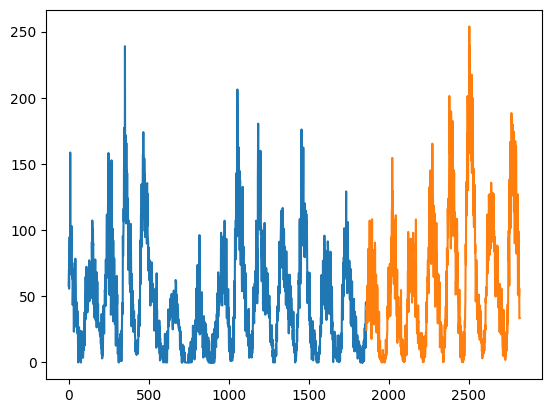

In [8]:
# plot train-test split of time series data
plt.plot(train)
plt.plot([None for i in train] + [x for x in test])
plt.show()

Using a train-test split method to evaluate machine learning models is fast. Preparing the data is simple and intuitive and only one model is created and evaluated. It is useful when you have a large amount of data so that both training and tests sets are representative of the original problem.

#### Multiple Train-Test Split

We can repeat the process of splitting the time series into train and test sets multiple times. This will require multiple models to be trained and evaluated, but this additional computational expense will provide a more robust estimate of the expected performance of the chosen method and configuration on unseen data.

Let’s look at how we can apply the TimeSeriesSplit on our sunspot data. The dataset has 2,820 observations. Let’s create 3 splits for the dataset. Using the same arithmetic above, we would expect the following train and test splits to be created:
- Split 1: 705 train, 705 test
- Split 2: 1,410 train, 705 test
- Split 3: 2,115 train, 705 test

Observations: 1410
Training Observations: 705
Testing Observations: 705

Observations: 2115
Training Observations: 1410
Testing Observations: 705

Observations: 2820
Training Observations: 2115
Testing Observations: 705



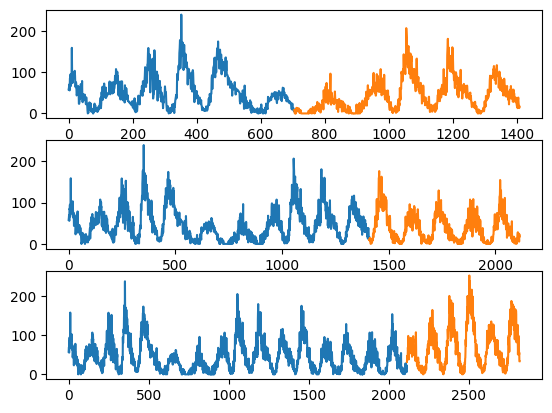

In [17]:
# calculate repeated train-test splits of time series data
from sklearn.model_selection import TimeSeriesSplit
splits = TimeSeriesSplit(n_splits=3)
plt.figure(1)
index = 1
for train_index, test_index in splits.split(X):
  train = X[train_index]
  test = X[test_index]
  print(f'Observations: {len(train) + len(test)}')
  print(f'Training Observations: {len(train)}')
  print(f'Testing Observations: {len(test)}\n')
  plt.subplot(310 + index)
  plt.plot(train)
  plt.plot([None for i in train] + [x for x in test])
  index += 1
plt.show()

#### Walk Forward Validation

In practice, we very likely will retrain our model as new data becomes available. This would give the model the best opportunity to make good forecasts at each time step.

Models can be trained and evaluated.
1. Starting at the beginning of the time series, the minimum number of samples in the window is used to train a model.
2. The model makes a prediction for the next time step.
3. The prediction is stored or evaluated against the known value.
4. The window is expanded to include the known value and the process is repeated (go to step 1.)

Because this methodology involves moving along the time series one-time step at a time, it is often called **Walk Forward Testing or Walk Forward Validation**. Additionally, because a sliding or expanding window is used to train a model, this method is also referred to as Rolling Window Analysis or a Rolling Forecast.

In [18]:
# walk forward evaluation model for time series data
X = series['Sunspots'].values
n_train = 500
n_records = len(X)
for i in range(n_train, n_records):
  train, test = X[:i], X[i:i+1]
  print(f'train={len(train)}, test={len(test)}')

train=500, test=1
train=501, test=1
train=502, test=1
train=503, test=1
train=504, test=1
train=505, test=1
train=506, test=1
train=507, test=1
train=508, test=1
train=509, test=1
train=510, test=1
train=511, test=1
train=512, test=1
train=513, test=1
train=514, test=1
train=515, test=1
train=516, test=1
train=517, test=1
train=518, test=1
train=519, test=1
train=520, test=1
train=521, test=1
train=522, test=1
train=523, test=1
train=524, test=1
train=525, test=1
train=526, test=1
train=527, test=1
train=528, test=1
train=529, test=1
train=530, test=1
train=531, test=1
train=532, test=1
train=533, test=1
train=534, test=1
train=535, test=1
train=536, test=1
train=537, test=1
train=538, test=1
train=539, test=1
train=540, test=1
train=541, test=1
train=542, test=1
train=543, test=1
train=544, test=1
train=545, test=1
train=546, test=1
train=547, test=1
train=548, test=1
train=549, test=1
train=550, test=1
train=551, test=1
train=552, test=1
train=553, test=1
train=554, test=1
train=555,

We can see the train set expanding each time step and the test set fixed at one time step ahead. Within the loop is where you would train and evaluate your model.

Walk-forward validation is the gold standard of model evaluation. It is the k-fold cross-validation of the time series world and is recommended for your own projects.